In [26]:
#natrual language processing

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
x=np.array([[1, 1], [2, 2.5], [3, 1.2], [5.5, 6.3], [6, 9], [7, 6], [8, 8]])

<IPython.core.display.Javascript object>


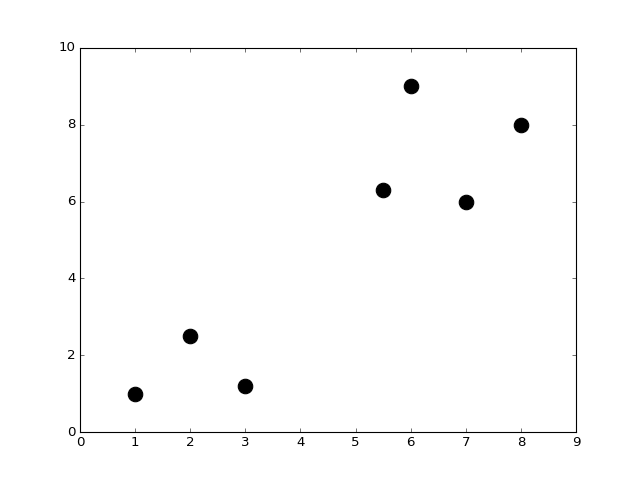

In [3]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], s=170, color="black")
plt.show()

In [4]:
#import k means algorithms to cluster them
from sklearn.cluster import KMeans
#run kmeans with k=2
k=2
kmeans=KMeans(n_clusters=k)
kmeans.fit(x)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

<IPython.core.display.Javascript object>


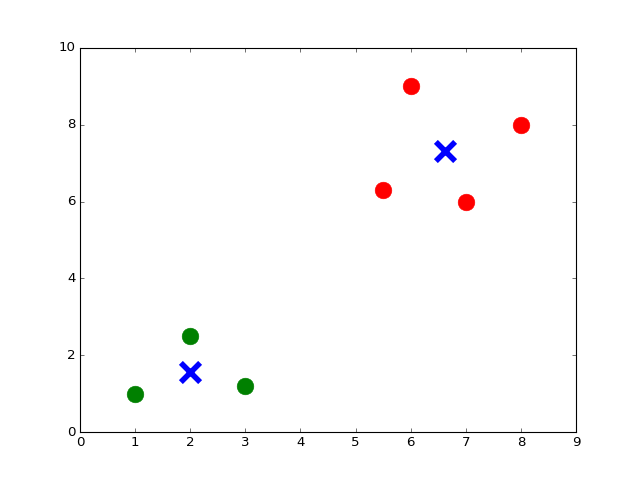

In [7]:
#plot the points with label assignments as given by kmeans
colors=["r.", "g."]
plt.figure()
for i in range (len(x)):
    plt.plot(x[i, 0], x[i, 1], colors[labels[i]], markersize=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=300, linewidths=5)
plt.show()

<IPython.core.display.Javascript object>


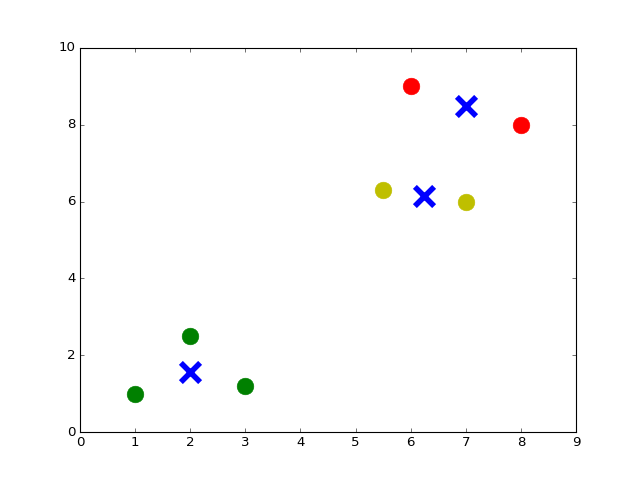

In [11]:
#run k-means with k=3
k=3
kmeans=KMeans(n_clusters=k)
kmeans.fit(x)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
colors=["r.", "g.", "y."]
plt.figure()
for i in range (len(x)):
    plt.plot(x[i, 0], x[i, 1], colors[labels[i]], markersize=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=300, linewidths=5)
plt.show()

<IPython.core.display.Javascript object>


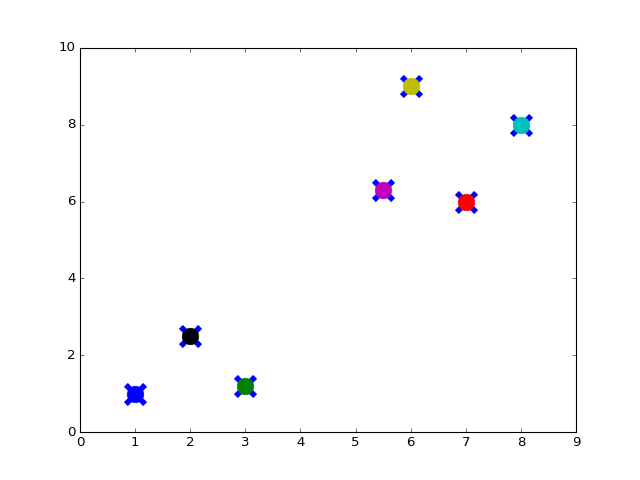

In [12]:
#run kmeans with k=7
k=7
kmeans=KMeans(n_clusters=k)
kmeans.fit(x)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
colors=["r.", 'g.', 'y.', "c.", "b.", "k. ", "m."]
plt.figure()
for i in range (len(x)):
    plt.plot(x[i, 0], x[i, 1], colors[labels[i]], markersize=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=300, linewidths=5)
plt.show()


In [14]:
#clustering documents
corpus=["I love CS50. staff is awesome, awesome, awesome!",
       "I have a dog and a cat.",
       "Best of CS50? Staff. And cakes. Ok, CS50 staff.",
       "My dog keeps chasing my cat. Dogs!"]
#Create the bags-of-words matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(stop_words="english")
z=count_vect.fit_transform(corpus)
z.todense()

matrix([[3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2],
        [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]], dtype=int64)

In [16]:
#take a look at the words in the vocabulary
vocab=count_vect.get_feature_names()
print (vocab)

['awesome', 'best', 'cakes', 'cat', 'chasing', 'cs50', 'dog', 'dogs', 'keeps', 'love', 'ok', 'staff']


In [19]:
#create frequency matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words="english")
x=vectorizer.fit_transform(corpus)
x.todense()

matrix([[ 0.89469821,  0.        ,  0.        ,  0.        ,  0.        ,
          0.23513012,  0.        ,  0.        ,  0.        ,  0.29823274,
          0.        ,  0.23513012],
        [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.        ,
          0.        ,  0.70710678,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.35415727,  0.35415727,  0.        ,  0.        ,
          0.55844332,  0.        ,  0.        ,  0.        ,  0.        ,
          0.35415727,  0.55844332],
        [ 0.        ,  0.        ,  0.        ,  0.38274272,  0.48546061,
          0.        ,  0.38274272,  0.48546061,  0.48546061,  0.        ,
          0.        ,  0.        ]])

In [20]:
#run k-means with k=2
k=2
from sklearn.metrics.pairwise import cosine_similarity
dist=1-cosine_similarity(x)
model=KMeans(n_clusters=k)
model.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
print ("Top terms per cluster:\n")
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
terms=vectorizer.get_feature_names()
for i in range (k):
    print ("Cluster %i:" %i, end="")
    for ind in order_centroids[i, :3]:
        print ("%s, " %terms[ind], end="")
    print ("")

Top terms per cluster:

Cluster 0:dog, cat, keeps, 
Cluster 1:awesome, staff, cs50, 
